In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
df=pd.read_csv('Titanic-Dataset.csv')
df1=df
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [17]:
# find null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
# select features and target
df2=df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Survived']].copy()
df2.sample(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
625,1,male,61.0,0,0,32.3208,S,0
265,2,male,36.0,0,0,10.5000,S,0
159,3,male,NaN,8,2,69.5500,S,0
784,3,male,25.0,0,0,7.0500,S,0
378,3,male,20.0,0,0,4.0125,C,0
30,1,male,40.0,0,0,27.7208,C,0
267,3,male,25.0,1,0,7.7750,S,1
262,1,male,52.0,1,1,79.6500,S,0
809,1,female,33.0,1,0,53.1000,S,1
335,3,male,NaN,0,0,7.8958,S,0


In [19]:
# handle missing values
df2['Age'].fillna(df['Age'].median(),inplace=True)
df2['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_23656\2924329087.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['Age'].fillna(df['Age'].median(),inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_23656\2924329087.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [20]:
df2.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

In [22]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
le=LabelEncoder()
df2['Sex']=le.fit_transform(df2['Sex']) # male:1, female:0
df2['Embarked']=le.fit_transform(df2['Embarked']) # C=0, Q=1, S=2
df2.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,22.0,1,0,7.2500,2,0
1,1,0,38.0,1,0,71.2833,0,1
2,3,0,26.0,0,0,7.9250,2,1
3,1,0,35.0,1,0,53.1000,2,1
4,3,1,35.0,0,0,8.0500,2,0
5,3,1,28.0,0,0,8.4583,1,0
6,1,1,54.0,0,0,51.8625,2,0
7,3,1,2.0,3,1,21.0750,2,0
8,3,0,27.0,0,2,11.1333,2,1
9,2,0,14.0,1,0,30.0708,0,1


In [27]:
x=df2.drop('Survived',axis=1)
y=df['Survived']
x.sample(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
273,1,1,37.0,0,1,29.7000,0
554,3,0,22.0,0,0,7.7750,2
866,2,0,27.0,1,0,13.8583,0
74,3,1,32.0,0,0,56.4958,2
623,3,1,21.0,0,0,7.8542,2
424,3,1,18.0,1,1,20.2125,2
398,2,1,23.0,0,0,10.5000,2
668,3,1,43.0,0,0,8.0500,2
456,1,1,65.0,0,0,26.5500,2
562,2,1,28.0,0,0,13.5000,2


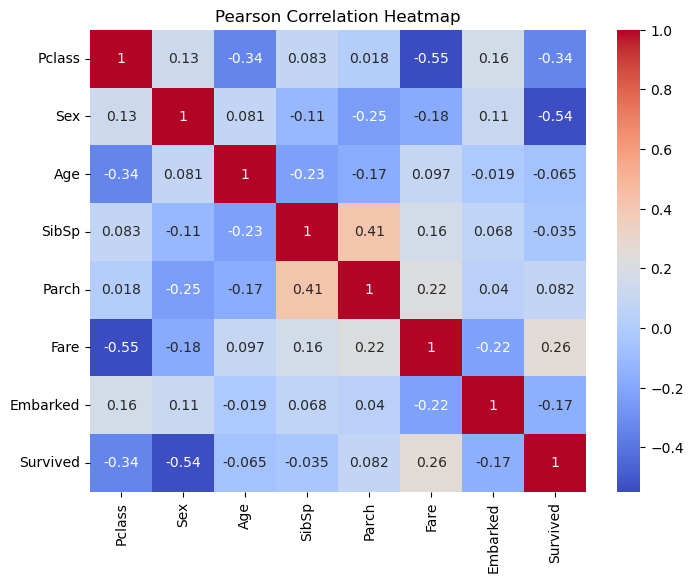

In [ ]:
# compare pearson correlation
corr=df2.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title('Pearson Correlation Heatmap')
plt.show()

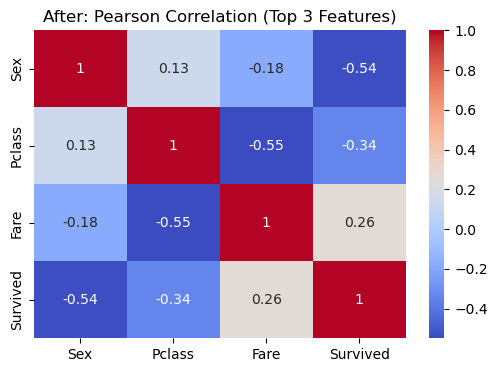

In [32]:
corr_matrix=df2.corr()
strong_corr=corr_matrix['Survived'].abs().sort_values(ascending=False)
selected=strong_corr[1:4].index.tolist() # top 3 features excluding target

# After selection
plt.figure(figsize=(6,4))
sns.heatmap(df2[selected+['Survived']].corr(),annot=True,cmap='coolwarm')
plt.title('After: Pearson Correlation (Top 3 Features)')
plt.show()